# The comparison of tropical precipitation histograms for different data

# Structure

1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Calculation of histogram of tropical precipitation](#3-calculating-the-histograms-of-tropical-precipitation)
 
4. [Comparing the plots for different data](#4-comparing-the-plots-for-different-data)


## 1. Load of  packages, modules and data

In [1]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import functions_for_xarrays,  graphic_creator, time_functions
sys.path.insert(0, '../')
from src.trop_prec_diagnostic import TR_PR_Diagnostic as TR_PR_Diag
from aqua.benchmark.time_functions import time_interpreter as time_interpreter

In [ ]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09", regrid="r010")
icon = reader.retrieve(regrid=True)
time_interpreter(icon)

In [ ]:
#icon_mon = reader.timmean(icon, freq='mon')
#icon_mon

#icon_mon=icon_mon['tprate'].isel(time=slice(10,20))
#icon_mon=icon_mon.compute()

In [3]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r010")
ifs = reader.retrieve(regrid=True)
time_interpreter(ifs)

'1H'

In [6]:
ifs_mon = reader.timmean(ifs, freq='mon')

In [4]:
reader = Reader(model="MSWEP", exp="past", source="monthly", regrid="r010")
mswep = reader.retrieve(regrid=True)
time_interpreter(mswep)

'M'

## 2. Initializing the class object and setting the class attributes

In [5]:
diag = TR_PR_Diag(trop_lat=15, s_time = 10, f_time = 20, num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15)

## 3. Calculating the histograms of tropical precipitation

In [6]:
hist_icon = diag.hist1d_fast(icon)
hist_icon 

<xarray.DataArray (left_edge: 20)>
array([6.903579e+06, 6.964800e+04, 3.705800e+04, 2.428600e+04,
       1.763600e+04, 1.353300e+04, 1.085500e+04, 9.089000e+03,
       7.773000e+03, 6.784000e+03, 5.793000e+03, 5.097000e+03,
       4.493000e+03, 3.969000e+03, 3.814000e+03, 3.470000e+03,
       3.083000e+03, 2.989000e+03, 2.710000e+03, 2.411000e+03])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    shortName:                    tprate
    target_units:                 m s**-1
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

In [7]:
hist_ifs  = diag.hist1d_fast(ifs)
hist_ifs

<xarray.DataArray (left_edge: 20)>
array([6.659502e+06, 1.276290e+05, 6.236400e+04, 4.080800e+04,
       3.030200e+04, 2.334100e+04, 1.905100e+04, 1.594300e+04,
       1.350900e+04, 1.178100e+04, 1.038900e+04, 9.150000e+03,
       8.307000e+03, 7.394000e+03, 6.762000e+03, 6.120000e+03,
       5.590000e+03, 5.129000e+03, 4.852000e+03, 4.328000e+03])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [8]:
hist_mswep = diag.hist1d_fast(mswep)
hist_mswep 

<xarray.DataArray (left_edge: 20)>
array([4.486386e+06, 2.012868e+06, 5.873100e+05, 9.685800e+04,
       1.249900e+04, 3.041000e+03, 7.340000e+02, 1.890000e+02,
       4.300000e+01, 2.500000e+01, 1.700000e+01, 9.000000e+00,
       8.000000e+00, 7.000000e+00, 2.000000e+00, 0.000000e+00,
       2.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes:
    units:         m s**-1
    history:       2023-05-01 20:03:36 variable renamed by AQUA fixer;\n2023-...
    paramId:       172228
    long_name:     Mean total precipitation rate
    cfVarName:     tprate
    shortName:     tprate
    target_units:  m s**-1
    factor:        3.802570537683474e-10
    offset:        0
    src_units:     mm month-1
    units_fixed:   1

## 4. Comparing the plots for different data

### Not that timestep for MSWEP highly different 

{<Axes: title={'center': 'Tropical prec'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x480 with 1 Axes>}

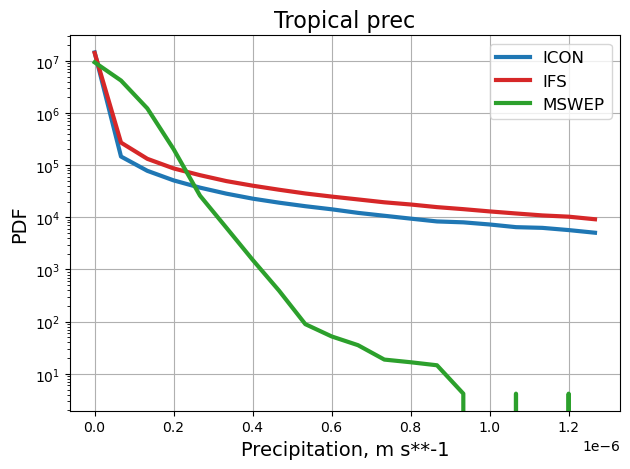

In [32]:
add = diag.hist_figure(hist_icon, pdf = True, smooth = True, label='ICON/ICON', save=False, plot_title = '')
diag.hist_figure(hist_ifs, pdf = True, smooth = True, add = add, color ='tab:red', label='IFS', save=False, 
                 plot_title = '') #"Trop precipitation rate comparison")
diag.hist_figure(hist_mswep, pdf = True, smooth = True, add = add, color ='tab:green', label='MSWEP', save=True, plot_title='Tropical prec')

{<Axes: title={'center': 'Tropical prec'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x480 with 1 Axes>}

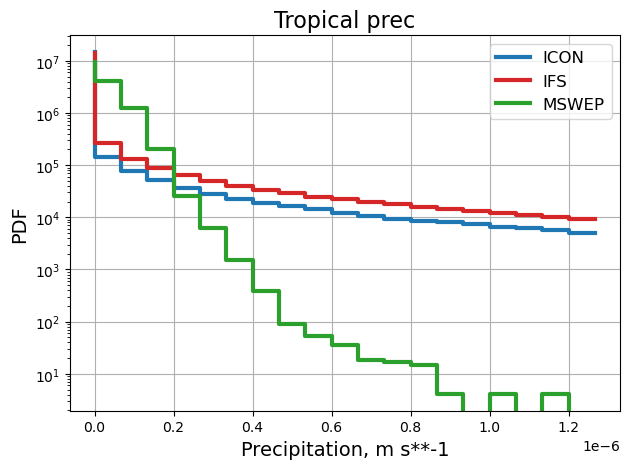

In [13]:
add = diag.hist_figure(hist_icon, pdf = True, step = True, smooth = False, label='ICON/ICON', save=False, plot_title = '')
diag.hist_figure(hist_ifs, pdf = True, step = True, smooth = False, add = add, color ='tab:red', label='IFS', save=False, 
                 plot_title = '') #"Trop precipitation rate comparison")
diag.hist_figure(hist_mswep, pdf = True, step = True,  smooth = False, add = add, color ='tab:green', label='MSWEP', save=True, plot_title='Tropical prec')

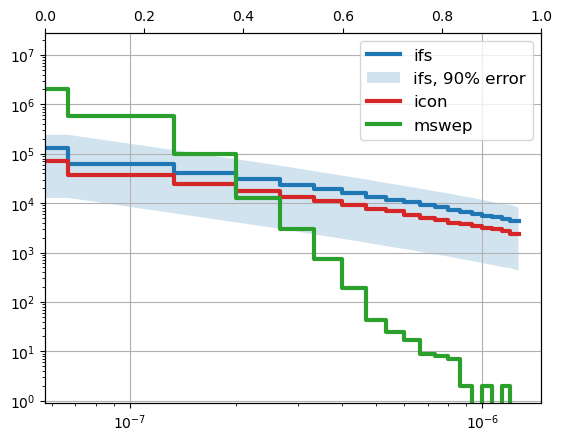

In [17]:
import matplotlib.pyplot as plt

data = hist_ifs
alpha = 0.9
data1= data[:]*(1+alpha)
data2= data[:]*(1-alpha)


fig, ax =  plt.subplots( ) 
ax2=ax.twiny()
# make a plot with different y-axis using second axis object
ax.step(data.left_edge, data, 
                linewidth=3.0, ls = '-', color = 'tab:blue', label =  'ifs' )
ax.fill_between(data.left_edge, data1, data2, alpha=0.2, label = 'ifs, 90% error')
data = hist_icon
ax.step(data.left_edge, data, 
                linewidth=3.0, ls = '-', color = 'tab:red', label =  'icon' )
data = hist_mswep
ax.step(data.left_edge, data, 
                linewidth=3.0, ls = '-', color = 'tab:green', label =  'mswep' )
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.grid(True)

In [9]:
def credibility(data_1, data_2, alpha=0.9):
    bool = True
    while alpha > 0 and bool==True:
        for i in range(0, len(data_1)):
            if data_2[i]<data_1[i]*(1-alpha) or data_2[i]>data_1[i]*(1+alpha):
                bool=False
                break
        if bool: alpha=alpha-0.1
    return alpha

In [11]:
credibility(data_1=hist_ifs, data_2=hist_icon, alpha=0.9)

0.40000000000000013

In [12]:
credibility(data_1=hist_ifs, data_2=hist_mswep, alpha=0.9)

0.9

In [19]:
from scipy.stats import ttest_ind
data1, data2 = hist_ifs, hist_icon
data3 = hist_mswep 

stat, p = ttest_ind(data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distributions (fail to reject H0)')
else:
 print('Different distributions (reject H0)')

Statistics=-0.007, p=0.994
Same distributions (fail to reject H0)


In [20]:
from scipy.stats import f_oneway
stat, p = f_oneway(data1, data2 )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=0.000, p=0.995
Probably the same distribution


In [ ]:
import numpy as np 
from scipy.stats import t

x = hist_ifs
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))

t_crit

m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))